### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

### 加载R包

In [86]:
library(Seurat)
library(ggplot2)
library(future)
library(tidyverse)
library(harmony)
library(SeuratDisk)
library(pheatmap)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)
library(reshape2)
library(ggrepel)

### Foldchange

In [89]:
library(compositions)

Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



载入程序包：‘compositions’


The following objects are masked from ‘package:stats’:

    anova, cor, cov, dist, var


The following object is masked from ‘package:graphics’:

    segments


The following objects are masked from ‘package:base’:

    %*%, norm, scale, scale.default




In [90]:
setwd('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/')
data <- as.data.frame(read.csv("scRNA_proportions_L3.csv",check.names = F,header = T))
data <- data[,c(1,2,5)]
data

sample,celltype_L3,proportion
<chr>,<chr>,<dbl>
HD-H134,Aptypical_Memory_B-ITGAX,1.651456e-03
HD-H134,CD4_Naive_T-CCR7,1.527597e-01
HD-H134,CD4_Naive_T-SOX4,1.312473e-02
HD-H134,CD4_Tcm-CXCR5,2.327249e-02
HD-H134,CD4_Tcm-GPR183,1.562364e-02
HD-H134,CD4_Tcm-IFIT3,1.038679e-02
HD-H134,CD4_Tcm-SOX4,1.564537e-03
HD-H134,CD4_Tem-CCR7neg,3.426771e-02
HD-H134,CD4_Tfh_like-CXCR5,6.866580e-03


In [91]:
wide_data <- dcast(data, celltype_L3 ~ sample, value.var = "proportion")
rownames(wide_data) <- wide_data$celltype_L3
wide_data <- wide_data[, -1] 
wide_data

,HD-H134,HD-H135,HD-H136,HD-H137,HD-H138,HD-H140,HD-H141,HD-H143,HD-H145,HD-H146,⋯,PD-H296,PD-H297,PD-H299,PD-H300,PD-H301,PD-H302,PD-H305,PD-H306,PD-H307,PD-H308
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,1.651456e-03,1.849454e-03,2.443028e-03,9.764263e-03,8.524819e-04,1.738330e-03,2.069717e-03,0.0060330108,1.939280e-03,0.0020858492,⋯,3.063725e-03,3.463415e-03,2.743610e-03,0.0095063666,6.610374e-03,6.408992e-04,0.0081200955,2.942315e-03,0.0093742391,7.522987e-03
CD4_Naive_T-CCR7,1.527597e-01,4.230627e-02,9.943887e-02,4.080067e-02,1.061727e-01,3.660719e-02,1.850763e-01,0.0801365965,7.329143e-02,0.0472060599,⋯,1.800999e-01,6.760976e-02,5.075678e-02,0.0536368394,1.253559e-01,5.506803e-02,0.1021494371,1.788618e-02,0.1026296567,7.931643e-02
CD4_Naive_T-SOX4,1.312473e-02,1.944239e-02,1.698668e-02,7.323197e-03,3.026311e-02,7.157830e-03,3.099129e-02,0.0093340922,1.263876e-02,0.0094412120,⋯,1.352753e-02,1.653659e-02,2.016553e-02,0.0228501657,1.486128e-02,3.939065e-02,0.0215626066,7.742935e-04,0.0096177258,8.823256e-03
CD4_Tcm-CXCR5,2.327249e-02,1.551230e-02,1.481086e-02,2.957177e-02,1.697214e-02,1.206606e-02,1.715686e-02,0.0290267501,2.273639e-02,0.0149302887,⋯,5.170626e-02,2.263415e-02,1.394668e-02,0.0308738880,2.378770e-02,9.514889e-03,0.0241555783,8.517228e-03,0.0609934259,7.513699e-02
CD4_Tcm-GPR183,1.562364e-02,2.640096e-02,1.500172e-02,2.113265e-02,1.511218e-02,1.370213e-02,1.759259e-02,0.0217416050,1.591547e-02,0.0066966736,⋯,2.554676e-02,8.292683e-03,1.472404e-02,0.0101168673,1.814234e-02,3.110826e-02,0.0109177755,1.873790e-02,0.0243486730,1.012353e-02
CD4_Tcm-IFIT3,1.038679e-02,4.970409e-03,2.824751e-03,5.300600e-03,3.371178e-03,2.607495e-03,9.912854e-03,0.0075128059,6.820917e-03,0.0013173784,⋯,1.164216e-02,4.000000e-03,5.898761e-03,0.0075876504,4.969843e-03,2.810097e-03,0.0036165131,3.019744e-03,0.0076698320,8.173122e-03
CD4_Tcm-SOX4,1.564537e-03,1.389403e-02,5.038745e-03,1.325150e-03,8.873561e-03,7.106703e-03,1.481481e-02,0.0059760956,7.155276e-03,0.0063124382,⋯,4.336350e-03,6.634146e-03,1.353514e-02,0.0177917321,5.886610e-03,2.834747e-02,0.0155578301,7.742935e-04,0.0052349647,5.201077e-03
CD4_Tem-CCR7neg,3.426771e-02,1.257629e-02,3.477497e-02,3.870833e-02,1.387221e-02,4.100414e-02,2.080610e-02,0.0244166192,3.484018e-02,0.0164123394,⋯,3.916855e-02,1.175610e-02,1.609584e-02,0.0043607186,1.201448e-02,6.310392e-03,0.0038894575,8.610143e-02,0.0206963720,1.894678e-02
CD4_Tfh_like-CXCR5,6.866580e-03,1.165156e-02,5.382296e-03,1.032222e-02,7.246096e-03,4.959354e-03,9.150327e-03,0.0167899829,9.562659e-03,0.0066417829,⋯,1.234917e-02,8.682927e-03,1.042572e-02,0.0264259550,8.057901e-03,1.291658e-02,0.0118048448,1.471158e-03,0.0194789384,2.247608e-02


In [92]:
#wide_data <- as.data.frame(clr(wide_data))
#wide_data

In [93]:
stage_info <- list(
    HDs = c('HD-H134','HD-H135','HD-H136','HD-H137','HD-H138','HD-H140','HD-H141','HD-H143',
                             'HD-H145','HD-H146','HD-H147','HD-H148','HD-H150','HD-H153','HD-H154','HD-H155',
                             'HD-H156','HD-H157','HD-H160','HD-H161','HD-H162','HD-H273','HD-H274','HD-H275',
                             'HD-H276','HD-H277','HD-H279','HD-H280-1','HD-H280-2','HD-H309','HD-H311','HD-H312',
                             'HD-H313','HD-H314','HD-H315','HD-H316','HD-H317','HD-H318','HD-H319','HD-H320',
                             'HD-H321','HD-H322','HD-H323','HD-H324','HD-H325','HD-H326','HD-H327','HD-H329',
                             'HD-H330','HD-H332','HD-H333','HD-H334','HD-H388'),
    INRs = c('PD-H201','PD-H202','PD-H204','PD-H207','PD-H210','PD-H212','PD-H214','PD-H218',
                             'PD-H219','PD-H220','PD-H221','PD-H222','PD-H223','PD-H224','PD-H225','PD-H228',
                             'PD-H229','PD-H230','PD-H231','PD-H232','PD-H233','PD-H237','PD-H238','PD-H240',
                             'PD-H241','PD-H242','PD-H246','PD-H247','PD-H255','PD-H258','PD-H260','PD-H263',
                             'PD-H264','PD-H265','PD-H266','PD-H276','PD-H277','PD-H278','PD-H281','PD-H285',
                             'PD-H286','PD-H288','PD-H289','PD-H273'),
    IRs = c('PD-H203','PD-H206','PD-H208','PD-H209','PD-H211','PD-H213','PD-H216','PD-H226',
                             'PD-H227','PD-H234','PD-H235','PD-H236','PD-H239','PD-H243','PD-H245','PD-H248',
                             'PD-H249','PD-H250','PD-H251','PD-H252','PD-H253','PD-H262','PD-H267','PD-H268',
                             'PD-H269','PD-H270','PD-H271','PD-H272','PD-H273','PD-H275','PD-H279','PD-H282',
                             'PD-H284','PD-H287','PD-H292','PD-H293','PD-H295','PD-H296','PD-H297','PD-H299',
                             'PD-H300','PD-H301','PD-H302','PD-H305','PD-H306','PD-H307','PD-H308'))

In [94]:
groups <- sapply(colnames(wide_data), function(sample) {
  group_name <- names(stage_info)[sapply(stage_info, function(x) sample %in% x)]
  if (length(group_name) > 0) return(group_name) else return(NA)
})
groups

HD-H134   HD-H135   HD-H136   HD-H137   HD-H138   HD-H140   HD-H141   HD-H143 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs" 
  HD-H145   HD-H146   HD-H147   HD-H148   HD-H150   HD-H153   HD-H154   HD-H155 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs" 
  HD-H156   HD-H157   HD-H160   HD-H161   HD-H162   HD-H273   HD-H274   HD-H275 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs" 
  HD-H276   HD-H277   HD-H279 HD-H280-1 HD-H280-2   HD-H309   HD-H311   HD-H312 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs" 
  HD-H313   HD-H314   HD-H315   HD-H316   HD-H317   HD-H318   HD-H319   HD-H320 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs" 
  HD-H321   HD-H322   HD-H323   HD-H324   HD-H325   HD-H326   HD-H327   HD-H329 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs"     "HDs" 
  HD-H330   HD-H332   HD-H333   HD-H334   HD-H388   PD-H201   PD-H202   PD-H203 
    "HDs"     "HDs"     "HDs"     "HDs"     "HDs"    "INRs"    "INRs"     "IRs" 
  PD-H204   PD-H206   PD-H207   PD-H208   PD-H209   PD-H210   PD-H211   PD-H212 
   "INRs"     "IRs"    "INRs"     "IRs"     "IRs"    "INRs"     "IRs"    "INRs" 
  PD-H213   PD-H214   PD-H216   PD-H218   PD-H219   PD-H220   PD-H221   PD-H222 
    "IRs"    "INRs"     "IRs"    "INRs"    "INRs"    "INRs"    "INRs"    "INRs" 
  PD-H223   PD-H224   PD-H225   PD-H226   PD-H227   PD-H228   PD-H229   PD-H230 
   "INRs"    "INRs"    "INRs"     "IRs"     "IRs"    "INRs"    "INRs"    "INRs" 
  PD-H231   PD-H232   PD-H233   PD-H234   PD-H235   PD-H236   PD-H237   PD-H238 
   "INRs"    "INRs"    "INRs"     "IRs"     "IRs"     "IRs"    "INRs"    "INRs" 
  PD-H239   PD-H240   PD-H241   PD-H242   PD-H243   PD-H245   PD-H246   PD-H247 
    "IRs"    "INRs"    "INRs"    "INRs"     "IRs"     "IRs"    "INRs"    "INRs" 
  PD-H248   PD-H249   PD-H250   PD-H251   PD-H252   PD-H253   PD-H255   PD-H258 
    "IRs"     "IRs"     "IRs"     "IRs"     "IRs"     "IRs"    "INRs"    "INRs" 
  PD-H260   PD-H262   PD-H263   PD-H264   PD-H265   PD-H266   PD-H267   PD-H268 
   "INRs"     "IRs"    "INRs"    "INRs"    "INRs"    "INRs"     "IRs"     "IRs" 
  PD-H269   PD-H270   PD-H271   PD-H272   PD-H275   PD-H276   PD-H277   PD-H278 
    "IRs"     "IRs"     "IRs"     "IRs"     "IRs"    "INRs"    "INRs"    "INRs" 
  PD-H279   PD-H281   PD-H282   PD-H284   PD-H285   PD-H286   PD-H287   PD-H288 
    "IRs"    "INRs"     "IRs"     "IRs"    "INRs"    "INRs"     "IRs"    "INRs" 
  PD-H289   PD-H292   PD-H293   PD-H295   PD-H296   PD-H297   PD-H299   PD-H300 
   "INRs"     "IRs"     "IRs"     "IRs"     "IRs"     "IRs"     "IRs"     "IRs" 
  PD-H301   PD-H302   PD-H305   PD-H306   PD-H307   PD-H308 
    "IRs"     "IRs"     "IRs"     "IRs"     "IRs"     "IRs"

In [95]:
group_means <- t(apply(wide_data, 1, function(row) {
  tapply(row, groups, mean, na.rm = TRUE)
}))
group_means

,HDs,INRs,IRs
Aptypical_Memory_B-ITGAX,5.223389e-03,0.0033905157,5.245817e-03
CD4_Naive_T-CCR7,8.802704e-02,0.0289117273,8.356552e-02
CD4_Naive_T-SOX4,1.853511e-02,0.0054389604,1.727951e-02
CD4_Tcm-CXCR5,2.737147e-02,0.0125662313,2.787130e-02
CD4_Tcm-GPR183,1.889776e-02,0.0116297100,1.826973e-02
CD4_Tcm-IFIT3,5.681926e-03,0.0037136711,5.577693e-03
CD4_Tcm-SOX4,1.093449e-02,0.0060809572,1.344700e-02
CD4_Tem-CCR7neg,2.222920e-02,0.0143136316,1.608125e-02
CD4_Tfh_like-CXCR5,1.389715e-02,0.0083243422,1.219797e-02
CD4_Th-TNFRSF11A,1.034552e-02,0.0051184469,8.480648e-03


In [60]:
group_means_df <- as.data.frame(group_means)
write.csv(group_means_df, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA/group_means.csv", row.names = TRUE)

### padj

In [96]:
# Wilcoxon rank-sum test 计算 p 值
calculate_wilcox_p_value <- function(data, groups, group1, group2) {
  # 创建一个空的 p 值向量
  p_values <- rep(NA, nrow(data))
  # 对每一行（每个细胞类型）进行 Wilcoxon 检验
  for (i in 1:nrow(data)) {
    # 提取该行数据
    row_data <- data[i,]
    # 按组分割数据
    group_data1 <- as.numeric(row_data[groups == group1])
    group_data2 <- as.numeric(row_data[groups == group2])
    # 如果某个组的样本数量不足，跳过该行
    if (length(group_data1) < 2 || length(group_data2) < 2) {
      p_values[i] <- NA  # 样本不足，返回 NA
    } else {
      # 执行 Wilcoxon rank-sum 检验
      test_result <- tryCatch(
        wilcox.test(group_data1, group_data2)$p.value,
        error = function(e) NA)
      p_values[i] <- test_result
          }
    }
  return(p_values)
}

In [97]:
p_values_INRs_HDs <- calculate_wilcox_p_value(wide_data, groups, "INRs", "HDs")
p_values_INRs_IRs <- calculate_wilcox_p_value(wide_data, groups, "INRs", "IRs")
p_values_IRs_HDs <- calculate_wilcox_p_value(wide_data, groups, "IRs", "HDs")
padj_INRs_HDs <- p.adjust(p_values_INRs_HDs, method = "BH")
padj_INRs_IRs <- p.adjust(p_values_INRs_IRs, method = "BH")
padj_IRs_HDs <- p.adjust(p_values_INRs_IRs, method = "BH")

Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”
Warning message in wilcox.test.default(group_data1, group_data2):
“无法精确计算带连结的p值”


In [99]:
results <- data.frame(
  p_values_INRs_HDs, padj_INRs_HDs,
  p_values_INRs_IRs, padj_INRs_IRs,
  p_values_IRs_HDs, padj_IRs_HDs
)
results <- cbind(rownames(group_means),results)
rownames(results) <- results[,1]
results <- results[,-1]
results

,p_values_INRs_HDs,padj_INRs_HDs,p_values_INRs_IRs,padj_INRs_IRs,p_values_IRs_HDs,padj_IRs_HDs
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,6.701638e-03,1.689978e-02,3.574440e-03,1.219515e-02,0.8967315656,1.219515e-02
CD4_Naive_T-CCR7,8.073569e-12,3.904636e-10,3.645717e-12,2.114516e-10,0.6814970995,2.114516e-10
CD4_Naive_T-SOX4,1.346426e-11,3.904636e-10,9.942222e-11,2.883244e-09,0.7655740687,2.883244e-09
CD4_Tcm-CXCR5,3.685381e-11,5.343802e-10,8.076671e-09,1.171117e-07,0.9078429220,1.171117e-07
CD4_Tcm-GPR183,1.018261e-05,5.369010e-05,1.506853e-04,1.092468e-03,0.3525853943,1.092468e-03
CD4_Tcm-IFIT3,2.853420e-05,1.273064e-04,1.475496e-03,6.112769e-03,0.3073535436,6.112769e-03
CD4_Tcm-SOX4,8.014064e-04,2.446398e-03,1.013660e-04,9.798717e-04,0.3862464706,9.798717e-04
CD4_Tem-CCR7neg,9.718311e-05,3.522888e-04,1.777042e-01,2.785634e-01,0.0027066216,2.785634e-01
CD4_Tfh_like-CXCR5,6.585494e-07,4.408340e-06,1.813519e-03,7.012272e-03,0.0929046322,7.012272e-03


In [100]:
write.csv(results, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA/padj.csv", row.names = TRUE)

### DEG count

In [82]:
setwd('/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/差异基因数目统计/')
data1 <- as.data.frame(read.csv("INRs_HDs_DEG_number.csv",check.names = F,header = T))
data1 <- data1[,c(1,4)]
colnames(data1) <- c("celltype","INRs_HDs_DEG_Count")
rownames(data1) <- data1[,1]
data2 <- as.data.frame(read.csv("INRs_IRs_DEG_number.csv",check.names = F,header = T))
data2 <- data2[,c(1,4)]
colnames(data2) <- c("celltype","INRs_IRs_DEG_Count")
rownames(data2) <- data2[,1]
data3 <- as.data.frame(read.csv("IRs_HDs_DEG_number.csv",check.names = F,header = T))
data3 <- data3[,c(1,4)]
colnames(data3) <- c("celltype","IRs_HDs_DEG_Count")
rownames(data3) <- data3[,1]
data <- cbind(data1,data2,data3)
data <- data[,c(2,4,6)]

In [83]:
data <- data[order(rownames(data)), ]
data

,INRs_HDs_DEG_Count,INRs_IRs_DEG_Count,IRs_HDs_DEG_Count
,<int>,<int>,<int>
Aptypical_Memory_B-ITGAX,202,36,88
CD4_Naive_T-CCR7,183,38,102
CD4_Naive_T-SOX4,81,12,62
CD4_Tcm-CXCR5,143,15,59
CD4_Tcm-GPR183,139,8,83
CD4_Tcm-IFIT3,162,28,49
CD4_Tcm-SOX4,209,16,130
CD4_Tem-CCR7neg,124,26,41
CD4_Tfh_like-CXCR5,163,15,59


In [84]:
write.csv(data, file = "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA/DEG_counts.csv", row.names = TRUE)

### Plots

In [101]:
group_means <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA/group_means.csv",check.names = F,header = T))
group_means

,HDs,INRs,IRs
<chr>,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,5.223389e-03,0.0033905157,5.245817e-03
CD4_Naive_T-CCR7,8.802704e-02,0.0289117273,8.356552e-02
CD4_Naive_T-SOX4,1.853511e-02,0.0054389604,1.727951e-02
CD4_Tcm-CXCR5,2.737147e-02,0.0125662313,2.787130e-02
CD4_Tcm-GPR183,1.889776e-02,0.0116297100,1.826973e-02
CD4_Tcm-IFIT3,5.681926e-03,0.0037136711,5.577693e-03
CD4_Tcm-SOX4,1.093449e-02,0.0060809572,1.344700e-02
CD4_Tem-CCR7neg,2.222920e-02,0.0143136316,1.608125e-02
CD4_Tfh_like-CXCR5,1.389715e-02,0.0083243422,1.219797e-02


In [102]:
logFG_INRs_HDs <- as.data.frame(log(group_means[,3]/group_means[,2],2))
logFG_INRs_IRs <- as.data.frame(log(group_means[,3]/group_means[,4],2))
logFG_IRs_HDs <- as.data.frame(log(group_means[,4]/group_means[,2],2))
logFG <- cbind(group_means[,1],logFG_INRs_IRs,logFG_INRs_HDs,logFG_IRs_HDs)
colnames(logFG) <- c("celltype","logFG_INRs_HDs","logFG_INRs_IRs","logFG_IRs_HDs")
rownames(logFG) <- logFG[,1]
logFG <- logFG[,-1]
logFG

,logFG_INRs_HDs,logFG_INRs_IRs,logFG_IRs_HDs
,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,-0.62966281,-0.6234814,0.006181360
CD4_Naive_T-CCR7,-1.53125292,-1.6062920,-0.075039043
CD4_Naive_T-SOX4,-1.66765922,-1.7688577,-0.101198525
CD4_Tcm-CXCR5,-1.14922822,-1.1231211,0.026107097
CD4_Tcm-GPR183,-0.65164035,-0.7003998,-0.048759498
CD4_Tcm-IFIT3,-0.58682253,-0.6135341,-0.026711570
CD4_Tcm-SOX4,-1.14491404,-0.8465151,0.298398900
CD4_Tem-CCR7neg,-0.16799023,-0.6350662,-0.467075921
CD4_Tfh_like-CXCR5,-0.55123333,-0.7393804,-0.188147087


In [106]:
padj <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA/padj.csv",check.names = F,header = T))
padj <- padj[,-c(2,4,6)]
rownames(padj) <- padj[,1]
padj <- padj[,-1]
padj

,padj_INRs_HDs,padj_INRs_IRs,padj_IRs_HDs
,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,1.689978e-02,1.219515e-02,1.219515e-02
CD4_Naive_T-CCR7,3.904636e-10,2.114516e-10,2.114516e-10
CD4_Naive_T-SOX4,3.904636e-10,2.883244e-09,2.883244e-09
CD4_Tcm-CXCR5,5.343802e-10,1.171117e-07,1.171117e-07
CD4_Tcm-GPR183,5.369010e-05,1.092468e-03,1.092468e-03
CD4_Tcm-IFIT3,1.273064e-04,6.112769e-03,6.112769e-03
CD4_Tcm-SOX4,2.446398e-03,9.798717e-04,9.798717e-04
CD4_Tem-CCR7neg,3.522888e-04,2.785634e-01,2.785634e-01
CD4_Tfh_like-CXCR5,4.408340e-06,7.012272e-03,7.012272e-03


In [107]:
DEG_counts <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA/DEG_counts.csv",check.names = F,header = T))
rownames(DEG_counts) <- DEG_counts[,1]
DEG_counts <- DEG_counts[,-1]
DEG_counts

,INRs_HDs_DEG_Count,INRs_IRs_DEG_Count,IRs_HDs_DEG_Count
,<int>,<int>,<int>
Aptypical_Memory_B-ITGAX,202,36,88
CD4_Naive_T-CCR7,183,38,102
CD4_Naive_T-SOX4,81,12,62
CD4_Tcm-CXCR5,143,15,59
CD4_Tcm-GPR183,139,8,83
CD4_Tcm-IFIT3,162,28,49
CD4_Tcm-SOX4,209,16,130
CD4_Tem-CCR7neg,124,26,41
CD4_Tfh_like-CXCR5,163,15,59


In [108]:
data <- cbind(logFG,padj,DEG_counts)
data

,logFG_INRs_HDs,logFG_INRs_IRs,logFG_IRs_HDs,padj_INRs_HDs,padj_INRs_IRs,padj_IRs_HDs,INRs_HDs_DEG_Count,INRs_IRs_DEG_Count,IRs_HDs_DEG_Count
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
Aptypical_Memory_B-ITGAX,-0.62966281,-0.6234814,0.006181360,1.689978e-02,1.219515e-02,1.219515e-02,202,36,88
CD4_Naive_T-CCR7,-1.53125292,-1.6062920,-0.075039043,3.904636e-10,2.114516e-10,2.114516e-10,183,38,102
CD4_Naive_T-SOX4,-1.66765922,-1.7688577,-0.101198525,3.904636e-10,2.883244e-09,2.883244e-09,81,12,62
CD4_Tcm-CXCR5,-1.14922822,-1.1231211,0.026107097,5.343802e-10,1.171117e-07,1.171117e-07,143,15,59
CD4_Tcm-GPR183,-0.65164035,-0.7003998,-0.048759498,5.369010e-05,1.092468e-03,1.092468e-03,139,8,83
CD4_Tcm-IFIT3,-0.58682253,-0.6135341,-0.026711570,1.273064e-04,6.112769e-03,6.112769e-03,162,28,49
CD4_Tcm-SOX4,-1.14491404,-0.8465151,0.298398900,2.446398e-03,9.798717e-04,9.798717e-04,209,16,130
CD4_Tem-CCR7neg,-0.16799023,-0.6350662,-0.467075921,3.522888e-04,2.785634e-01,2.785634e-01,124,26,41
CD4_Tfh_like-CXCR5,-0.55123333,-0.7393804,-0.188147087,4.408340e-06,7.012272e-03,7.012272e-03,163,15,59


In [111]:
data$aggreated_INRs_HDs <- -log(data$padj_INRs_HDs,10)*data$INRs_HDs_DEG_Count
data$aggreated_INRs_IRs <- -log(data$padj_INRs_IRs,10)*data$INRs_IRs_DEG_Count
data$aggreated_IRs_HDs <- -log(data$padj_IRs_HDs,10)*data$IRs_HDs_DEG_Count
data <- data[rownames(data) != "cMono-IL1B", ]
data$celltype <- rownames(data)
data

,logFG_INRs_HDs,logFG_INRs_IRs,logFG_IRs_HDs,padj_INRs_HDs,padj_INRs_IRs,padj_IRs_HDs,INRs_HDs_DEG_Count,INRs_IRs_DEG_Count,IRs_HDs_DEG_Count,aggreated_INRs_HDs,aggreated_INRs_IRs,aggreated_IRs_HDs,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Aptypical_Memory_B-ITGAX,-0.62966281,-0.6234814,0.006181360,1.689978e-02,1.219515e-02,1.219515e-02,202,36,88,357.9680167,68.89726587,168.4155388,Aptypical_Memory_B-ITGAX
CD4_Naive_T-CCR7,-1.53125292,-1.6062920,-0.075039043,3.904636e-10,2.114516e-10,2.114516e-10,183,38,102,1721.7407552,367.64198621,986.8284893,CD4_Naive_T-CCR7
CD4_Naive_T-SOX4,-1.66765922,-1.7688577,-0.101198525,3.904636e-10,2.883244e-09,2.883244e-09,81,12,62,762.0819736,102.48142242,529.4873492,CD4_Naive_T-SOX4
CD4_Tcm-CXCR5,-1.14922822,-1.1231211,0.026107097,5.343802e-10,1.171117e-07,1.171117e-07,143,15,59,1325.9173940,103.97099389,408.9525760,CD4_Tcm-CXCR5
CD4_Tcm-GPR183,-0.65164035,-0.7003998,-0.048759498,5.369010e-05,1.092468e-03,1.092468e-03,139,8,83,593.5447014,23.69272909,245.8120643,CD4_Tcm-GPR183
CD4_Tcm-IFIT3,-0.58682253,-0.6135341,-0.026711570,1.273064e-04,6.112769e-03,6.112769e-03,162,28,49,631.0142538,61.98533602,108.4743380,CD4_Tcm-IFIT3
CD4_Tcm-SOX4,-1.14491404,-0.8465151,0.298398900,2.446398e-03,9.798717e-04,9.798717e-04,209,16,130,545.7978196,48.14129273,391.1480034,CD4_Tcm-SOX4
CD4_Tem-CCR7neg,-0.16799023,-0.6350662,-0.467075921,3.522888e-04,2.785634e-01,2.785634e-01,124,26,41,428.1845471,14.43197472,22.7581140,CD4_Tem-CCR7neg
CD4_Tfh_like-CXCR5,-0.55123333,-0.7393804,-0.188147087,4.408340e-06,7.012272e-03,7.012272e-03,163,15,59,872.9831648,32.31211854,127.0943329,CD4_Tfh_like-CXCR5


In [112]:
data_INRs_HDs <- data[,c(1,4,7,10,13)]
data_INRs_IRs <- data[,c(2,5,8,11,13)]
data_IRs_HDs <- data[,c(3,6,9,12,13)]
data_INRs_HDs
data_INRs_IRs
data_IRs_HDs

,logFG_INRs_HDs,padj_INRs_HDs,INRs_HDs_DEG_Count,aggreated_INRs_HDs,celltype
,<dbl>,<dbl>,<int>,<dbl>,<chr>
Aptypical_Memory_B-ITGAX,-0.62966281,1.689978e-02,202,357.9680167,Aptypical_Memory_B-ITGAX
CD4_Naive_T-CCR7,-1.53125292,3.904636e-10,183,1721.7407552,CD4_Naive_T-CCR7
CD4_Naive_T-SOX4,-1.66765922,3.904636e-10,81,762.0819736,CD4_Naive_T-SOX4
CD4_Tcm-CXCR5,-1.14922822,5.343802e-10,143,1325.9173940,CD4_Tcm-CXCR5
CD4_Tcm-GPR183,-0.65164035,5.369010e-05,139,593.5447014,CD4_Tcm-GPR183
CD4_Tcm-IFIT3,-0.58682253,1.273064e-04,162,631.0142538,CD4_Tcm-IFIT3
CD4_Tcm-SOX4,-1.14491404,2.446398e-03,209,545.7978196,CD4_Tcm-SOX4
CD4_Tem-CCR7neg,-0.16799023,3.522888e-04,124,428.1845471,CD4_Tem-CCR7neg
CD4_Tfh_like-CXCR5,-0.55123333,4.408340e-06,163,872.9831648,CD4_Tfh_like-CXCR5


,logFG_INRs_IRs,padj_INRs_IRs,INRs_IRs_DEG_Count,aggreated_INRs_IRs,celltype
,<dbl>,<dbl>,<int>,<dbl>,<chr>
Aptypical_Memory_B-ITGAX,-0.6234814,1.219515e-02,36,68.89726587,Aptypical_Memory_B-ITGAX
CD4_Naive_T-CCR7,-1.6062920,2.114516e-10,38,367.64198621,CD4_Naive_T-CCR7
CD4_Naive_T-SOX4,-1.7688577,2.883244e-09,12,102.48142242,CD4_Naive_T-SOX4
CD4_Tcm-CXCR5,-1.1231211,1.171117e-07,15,103.97099389,CD4_Tcm-CXCR5
CD4_Tcm-GPR183,-0.7003998,1.092468e-03,8,23.69272909,CD4_Tcm-GPR183
CD4_Tcm-IFIT3,-0.6135341,6.112769e-03,28,61.98533602,CD4_Tcm-IFIT3
CD4_Tcm-SOX4,-0.8465151,9.798717e-04,16,48.14129273,CD4_Tcm-SOX4
CD4_Tem-CCR7neg,-0.6350662,2.785634e-01,26,14.43197472,CD4_Tem-CCR7neg
CD4_Tfh_like-CXCR5,-0.7393804,7.012272e-03,15,32.31211854,CD4_Tfh_like-CXCR5


,logFG_IRs_HDs,padj_IRs_HDs,IRs_HDs_DEG_Count,aggreated_IRs_HDs,celltype
,<dbl>,<dbl>,<int>,<dbl>,<chr>
Aptypical_Memory_B-ITGAX,0.006181360,1.219515e-02,88,168.4155388,Aptypical_Memory_B-ITGAX
CD4_Naive_T-CCR7,-0.075039043,2.114516e-10,102,986.8284893,CD4_Naive_T-CCR7
CD4_Naive_T-SOX4,-0.101198525,2.883244e-09,62,529.4873492,CD4_Naive_T-SOX4
CD4_Tcm-CXCR5,0.026107097,1.171117e-07,59,408.9525760,CD4_Tcm-CXCR5
CD4_Tcm-GPR183,-0.048759498,1.092468e-03,83,245.8120643,CD4_Tcm-GPR183
CD4_Tcm-IFIT3,-0.026711570,6.112769e-03,49,108.4743380,CD4_Tcm-IFIT3
CD4_Tcm-SOX4,0.298398900,9.798717e-04,130,391.1480034,CD4_Tcm-SOX4
CD4_Tem-CCR7neg,-0.467075921,2.785634e-01,41,22.7581140,CD4_Tem-CCR7neg
CD4_Tfh_like-CXCR5,-0.188147087,7.012272e-03,59,127.0943329,CD4_Tfh_like-CXCR5


In [113]:
data_IRs_HDs$celltype <- factor(data_IRs_HDs$celltype, levels = c('CD4_Naive_T-CCR7','CD4_Naive_T-SOX4','CD4_Tcm-GPR183','CD4_Tcm-SOX4','CD4_Tcm-CXCR5','CD4_Tcm-IFIT3','CD4_Tem-CCR7neg','CD4_Tfh_like-CXCR5','CD4_Th-TNFRSF11A',
                                                                    'CD4_Th1-GZMK','CD4_Th17-RORC','CD4_Th22-CCR10','CD4_Treg-FCRL3','CD4_Treg-FOXP3','CD8_Naive_T-CCR7','CD8_Tcm-GPR183','CD8_Tcm-IFI44L','CD8_Tcm-GZMK','CD8_Tem-GZMK',
                                                                    'CD8_CTL-GZMK','CD8_CTL-GZMB','MAIT-SLC4A10','gdT2-GZMK','gdT2-GZMH','gdT2-IL12RB2','Cycling_T-MKI67','NKT-NCR1','NKT-IFIT3','NK_bright-XCL1','Transitional_NK-GZMK',
                                                                    'Mature_NK_dim-FCGR3A','Inflamed_NK_dim-IFI44L','Terminal_NK_dim-CD160neg','cMono-CD14','cMono-IFI44L','ncMono-FCGR3A','ncMono-IFI44L','ncMono-IFIT1','ncMono-C1QA',
                                                                    'cDC1-BATF3','cDC2-CD1C','pDC-LILRA4','pDC-AXL','Naive_B-TCL1A','Naive_B-IL6','Naive_B-IFIT3','Transitional_B-NEIL1','Aptypical_Memory_B-ITGAX','Unswitched_Memory_B-CD1C',
                                                                    'Unswitched_Memory_B-IFIT3','Unswitched_Memory_B-JAM3','Switched_Memory_B-CD27','Switched_Memory_B-CD86','Switched_Memory_B-IGHE','Plasma_B-IGHA1','Plasma_B-IGHG1',
                                                                    'Plasmablast-MKI67'))

In [126]:
subdata <- subset(data_IRs_HDs,abs(logFG_IRs_HDs) > 0.5 & IRs_HDs_DEG_Count > 20 & aggreated_IRs_HDs > 100)
subdata
labels_vector <- subdata$celltype
labels_vector

,logFG_IRs_HDs,padj_IRs_HDs,IRs_HDs_DEG_Count,aggreated_IRs_HDs,celltype
,<dbl>,<dbl>,<int>,<dbl>,<fct>
CD8_CTL-GZMB,0.5641306,0.1451562,123,103.0942,CD8_CTL-GZMB


[1] CD8_CTL-GZMB
57 Levels: CD4_Naive_T-CCR7 CD4_Naive_T-SOX4 CD4_Tcm-GPR183 ... Plasmablast-MKI67

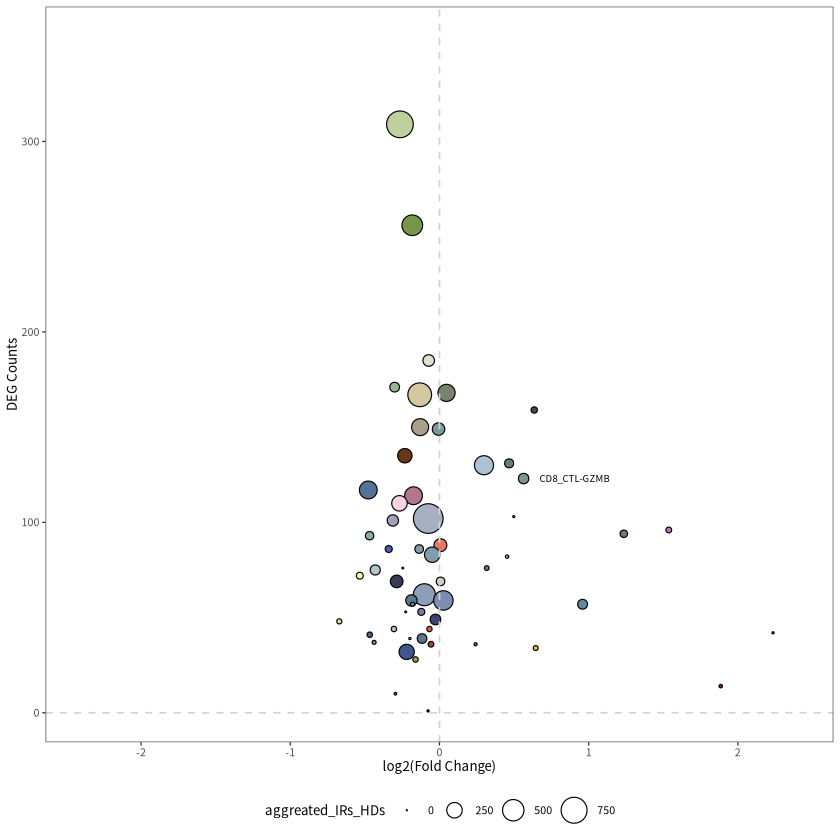

In [127]:
p <- ggplot(data_IRs_HDs, aes(x = logFG_IRs_HDs, y = IRs_HDs_DEG_Count, size = aggreated_IRs_HDs)) +
  geom_point(aes(fill = celltype),shape = 21) +
  scale_fill_manual(values = c('#A7B0C2','#8D9FB8','#7F9DAD','#AEC2D7','#7C8CB2','#3E436D','#476485','#557A90','#383857','#4C5CB0','#557396','#B3C5C8','#41578A','#7A8EA7','#8799A4','#C2CDCA','#3E4952',
                               '#7C9999','#667F85','#A0AEB0','#7E9594','#89AEAE','#6F9FB7','#90B0B2','#708C9B','#5F88A1','#6C9FA9','#717677','#5A7585','#787CA5','#A89FB7','#3C314B','#906A8C','#779649',
                               '#C0D09D','#AC9F8A','#D5C8A0','#68361A','#79836C','#BFC1A9','#9BB496','#E0E0D0','#8F6D5F','#FFF799','#D6BC46','#AB9556','#E0DE8A','#E67762','#B2778E','#C3555E','#F9D3E3',
                               '#D39EB1','#D66047','#A04236','#BA7AB1','#7D5284','#8A1874')) +
  geom_hline(yintercept = 0, color = "lightgray", size = 0.5, linetype=2) + 
  geom_vline(xintercept = 0, color = "lightgray", size = 0.5, linetype=2) + 
  theme_bw(base_size = 8) +
  scale_size_continuous(range = c(0, 8), limits = c(0, max(data_IRs_HDs$aggreated_IRs_HDs))) +
  xlab("log2(Fold Change)") +
  ylab("DEG Counts") +
  theme(legend.position = "bottom") +
  scale_x_continuous(limits = c(-2.4, 2.4)) +
  guides(fill = "none", size = guide_legend("aggreated_IRs_HDs")) + 
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  geom_text_repel(
    data = data_IRs_HDs %>% filter(celltype %in% labels_vector),
    box.padding = 0.5,force = 0.5,max.overlaps = 100,nudge_x = 0.15,hjust = 0.1,segment.size = 0.1,
    mapping = aes(label = celltype),size = 2) +
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.2)))
p

In [130]:
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/CLR-DEG/RNA-IRs-HDs.pdf",p, width = 5, height = 5.5)